# **Importing libaries**

In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# **Loading the dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# **Reshaping training and testing dataset and printing first 10 samples**

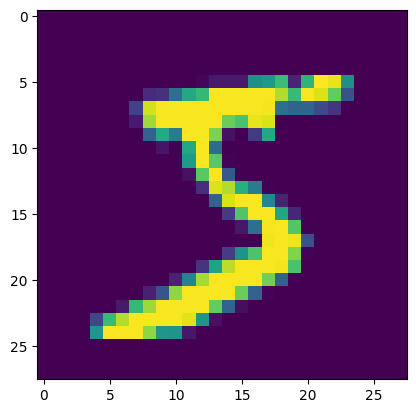

Actually the digit in the image is >>>>  5


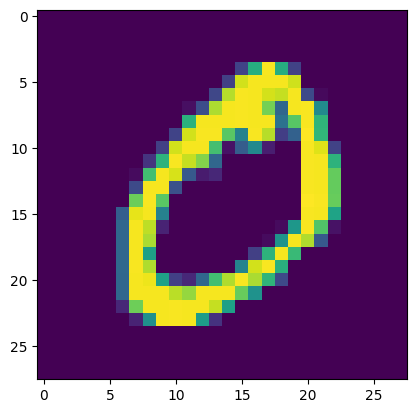

Actually the digit in the image is >>>>  0


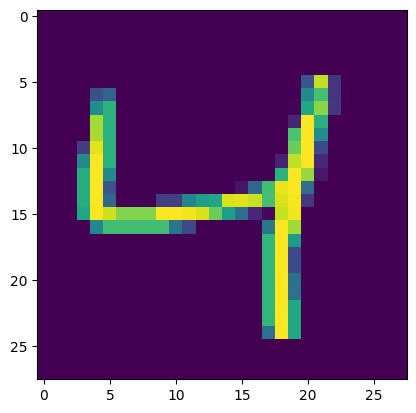

Actually the digit in the image is >>>>  4


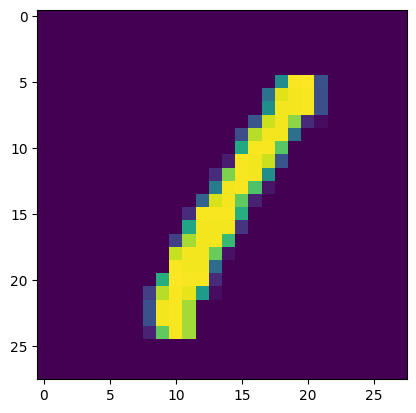

Actually the digit in the image is >>>>  1


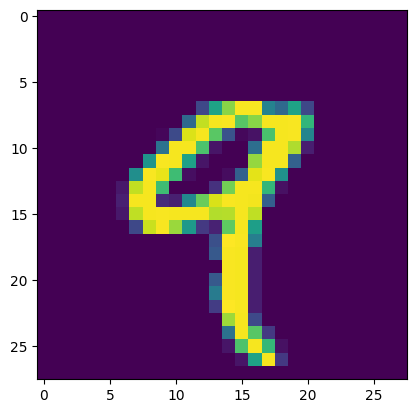

Actually the digit in the image is >>>>  9


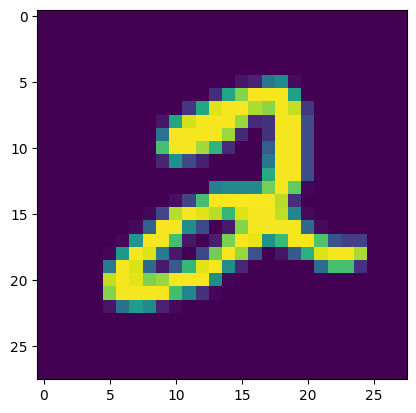

Actually the digit in the image is >>>>  2


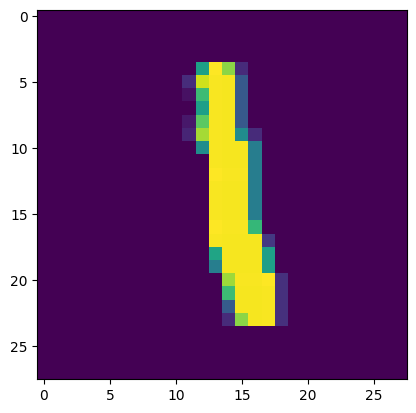

Actually the digit in the image is >>>>  1


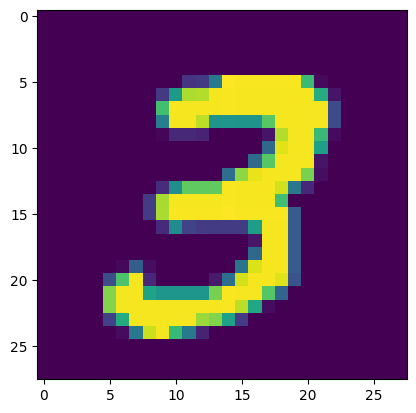

Actually the digit in the image is >>>>  3


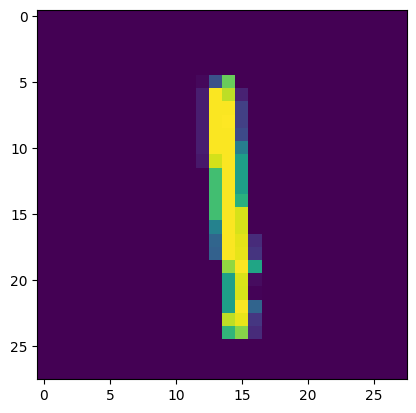

Actually the digit in the image is >>>>  1


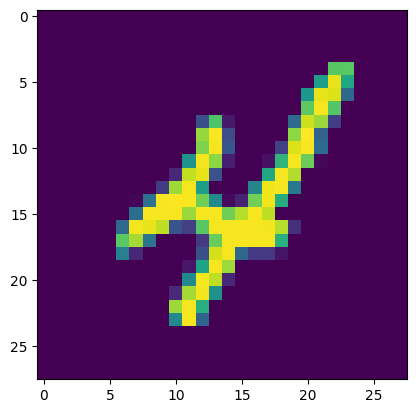

Actually the digit in the image is >>>>  4


In [ ]:
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)
for i in range(0,10):
  plt.imshow(x_train[i])
  plt.show()
  print("Actually the digit in the image is >>>> ",y_train[i])

# **Again reshaping the value and dividing by 255 to get the values between 0 & 1**


*   **0 --> Black**
*   **255 --> White**



In [ ]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0

# **Model building using Sequential Neural Network**

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28*28)),
    layers.Dense(512, activation="relu"),
    layers.Dense(264, activation="relu"),
    layers.Dense(50),
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
model.fit(x_train,y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test,y_test,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 31s - loss: 0.1972 - accuracy: 0.9415 - 31s/epoch - 17ms/step
Epoch 2/5
1875/1875 - 16s - loss: 0.0815 - accuracy: 0.9742 - 16s/epoch - 9ms/step
Epoch 3/5
1875/1875 - 16s - loss: 0.0553 - accuracy: 0.9826 - 16s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 16s - loss: 0.0409 - accuracy: 0.9865 - 16s/epoch - 9ms/step
Epoch 5/5
1875/1875 - 16s - loss: 0.0343 - accuracy: 0.9887 - 16s/epoch - 8ms/step
313/313 - 1s - loss: 0.0732 - accuracy: 0.9794 - 1s/epoch - 4ms/step


[0.07319504022598267, 0.9793999791145325]

In [ ]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(28*28)))
model2.add(keras.layers.Dense(500, activation="relu"))
model2.add(keras.layers.Dense(264, activation="relu"))
model2.add(keras.layers.Dense(50))
model2 = keras.Model (inputs=model2.input,
                    outputs=model2.output)
model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
model2.fit(x_train,y_train, batch_size=32, epochs=5, verbose=2)
model2.evaluate(x_test,y_test,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 16s - loss: 0.1971 - accuracy: 0.9409 - 16s/epoch - 9ms/step
Epoch 2/5
1875/1875 - 15s - loss: 0.0794 - accuracy: 0.9747 - 15s/epoch - 8ms/step
Epoch 3/5
1875/1875 - 16s - loss: 0.0535 - accuracy: 0.9829 - 16s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 16s - loss: 0.0421 - accuracy: 0.9866 - 16s/epoch - 8ms/step
Epoch 5/5
1875/1875 - 15s - loss: 0.0321 - accuracy: 0.9893 - 15s/epoch - 8ms/step
313/313 - 1s - loss: 0.0808 - accuracy: 0.9764 - 993ms/epoch - 3ms/step


[0.08077199757099152, 0.9764000177383423]

# **Checking model's prediction with a random image**

In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Reshape(target_shape=(28, 28, 1)),
        layers.Conv2D(50, activation="relu", kernel_size=(3, 3), strides=(1, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(26, activation="relu", kernel_size=(3, 3), strides=(1, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(20, activation="relu"),
        layers.Dense(10),
    ]
)
model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)
hus = model3.fit(x_train,y_train, batch_size=32,epochs=10,verbose=2)
model3.evaluate(x_test,y_test,batch_size=32,verbose=2)

Epoch 1/10
1875/1875 - 51s - loss: 0.2030 - accuracy: 0.9370 - 51s/epoch - 27ms/step
Epoch 2/10
1875/1875 - 50s - loss: 0.0644 - accuracy: 0.9805 - 50s/epoch - 27ms/step
Epoch 3/10
1875/1875 - 48s - loss: 0.0469 - accuracy: 0.9855 - 48s/epoch - 26ms/step
Epoch 4/10
1875/1875 - 50s - loss: 0.0364 - accuracy: 0.9887 - 50s/epoch - 26ms/step
Epoch 5/10
1875/1875 - 50s - loss: 0.0302 - accuracy: 0.9907 - 50s/epoch - 27ms/step
Epoch 6/10
1875/1875 - 51s - loss: 0.0253 - accuracy: 0.9921 - 51s/epoch - 27ms/step
Epoch 7/10
1875/1875 - 50s - loss: 0.0210 - accuracy: 0.9930 - 50s/epoch - 26ms/step
Epoch 8/10
1875/1875 - 48s - loss: 0.0175 - accuracy: 0.9941 - 48s/epoch - 26ms/step
Epoch 9/10
1875/1875 - 50s - loss: 0.0155 - accuracy: 0.9946 - 50s/epoch - 26ms/step
Epoch 10/10
1875/1875 - 49s - loss: 0.0132 - accuracy: 0.9958 - 49s/epoch - 26ms/step
313/313 - 2s - loss: 0.0435 - accuracy: 0.9873 - 2s/epoch - 8ms/step


[0.0435347706079483, 0.9872999787330627]

313/313 [==============================] - 5s 16ms/step


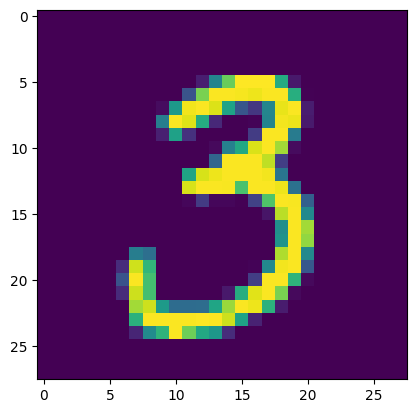

[ -9.940121   -4.209739   -7.2561765  20.475035   -8.6701145   4.4798083
 -13.127497   -2.0480626   3.1748996   2.808525  -23.677912  -27.662155
 -23.737013  -22.111027  -24.189     -26.532852  -24.040203  -23.597166
 -23.563347  -23.137285  -26.424936  -23.522978  -24.10727   -21.751255
 -22.82564   -23.400002  -23.329578  -23.814508  -22.800531  -24.620459
 -26.061417  -25.07566   -24.057665  -22.716238  -23.129484  -23.642445
 -24.266191  -22.425512  -22.834806  -25.384533  -23.344185  -24.29725
 -23.72802   -23.07037   -23.97546   -25.564747  -26.012691  -21.366343
 -23.807549  -25.931002 ]
[-11.073966    -6.92627     -1.1198997   26.32621    -10.4303665
   1.0150721   -9.93361     -8.214406     5.165553    -0.11132947]


In [ ]:
y1 = model.predict(x_test)
y2 = model3.predict(x_test)
x_test = x_test.reshape(-1,28,28)
plt.imshow(x_test[90])
plt.show()
print(y1[90])
print(y2[90])

In [ ]:
import numpy as np
import pandas as pd
print(np.argmax(y1[90]), np.argmax(y2[90]))

3 3


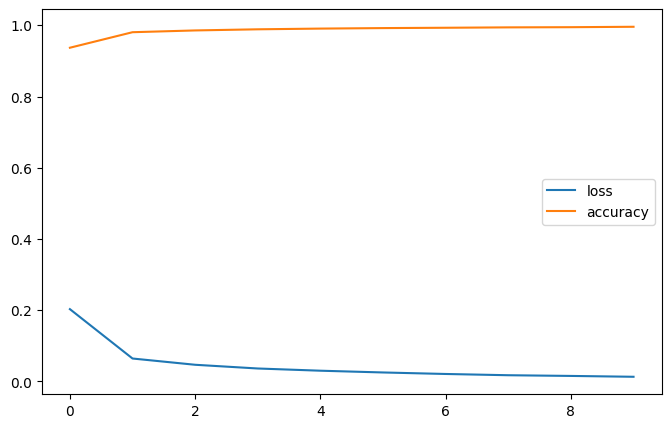

In [ ]:
pd.DataFrame(hus.history).plot(figsize=(8, 5))
plt.show()

# **Converting the predicted probablity for each values in predicted digits to integer for easy understanding**

In [ ]:
y1_labaled = [np.argmax(i) for i in y1]
y2_labled =[np.argmax(i) for i in y2]

# **Ploting a *Heatmap* for better visualization of Confusion Matrix**

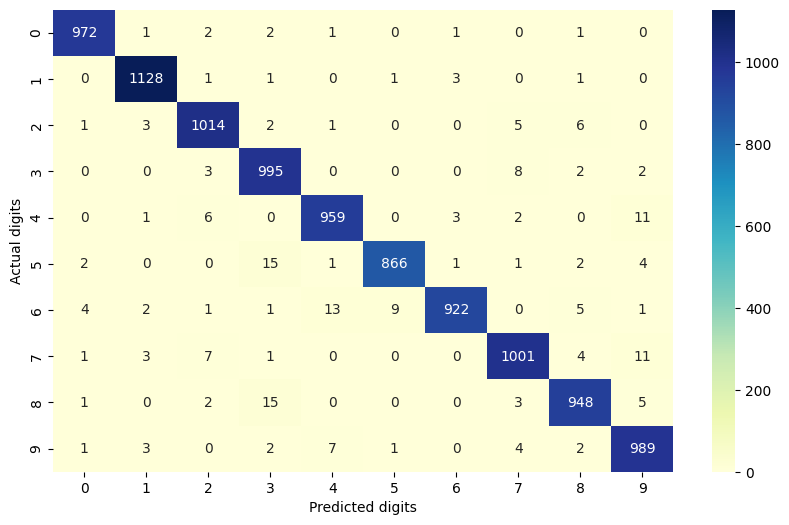

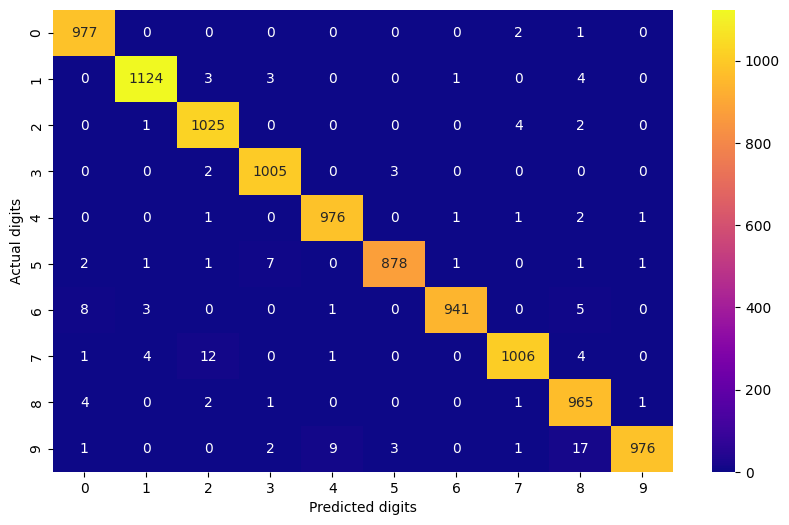

In [ ]:
confu = tf.math.confusion_matrix(y_test,y1_labaled)
confu2 = tf.math.confusion_matrix(y_test,y2_labled)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confu,annot=True,cmap='YlGnBu',fmt='d',xticklabels=range(10),yticklabels=range(10))
plt.xlabel("Predicted digits")
plt.ylabel("Actual digits")
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(confu2,annot=True,cmap='plasma',fmt='d',xticklabels=range(10),yticklabels=range(10))
plt.xlabel("Predicted digits")
plt.ylabel("Actual digits")
plt.show()